
MNIST Data Classification Code

Import the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

Download the Data

In [ ]:
(P_train, Q_train), (P_test, Q_test)=tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
P_train.shape,Q_train.shape, "------" , P_test.shape,Q_test.shape

((60000, 28, 28), (60000,), '------', (10000, 28, 28), (10000,))

In [ ]:
P_train[0]

In [ ]:
Q_train[0]

9

In [ ]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker", "Bag", "Ankle boot"]
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Showing an image from the training data

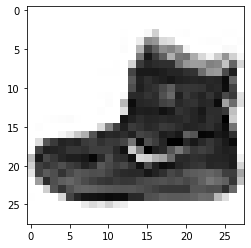

In [ ]:
plt.imshow(P_train[0],cmap='Greys')

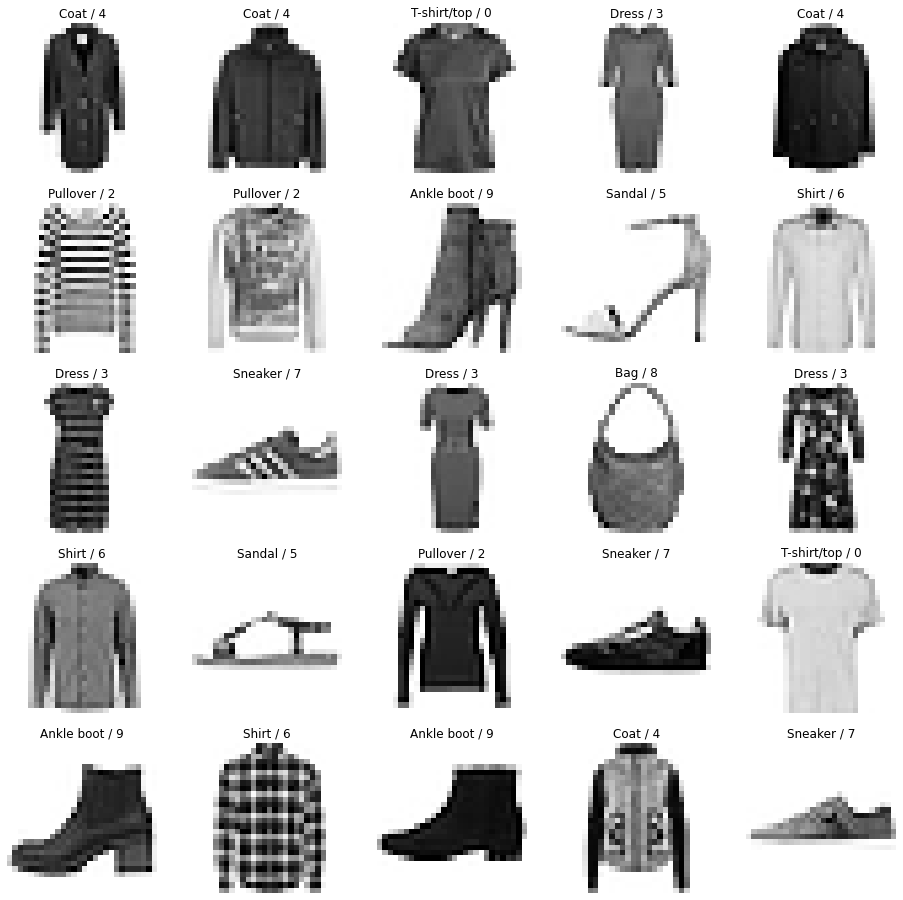

In [ ]:
plt.figure(figsize=(16,16))

j=1
for  i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(P_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[Q_train[i]],Q_train[i]))

In [ ]:
P_train = np.expand_dims(P_train,-1)
P_test = np.expand_dims(P_test,-1)
P_train.ndim

4

Changing the dimension/Scaling the features

In [ ]:
P_train = P_train/255
P_test= P_test/255

In [ ]:
P_train[0]

Splitting the Dataset

In [ ]:
from sklearn.model_selection import  train_test_split
P_train,P_Validation,Q_train,Q_Validation=train_test_split(P_train,Q_train,test_size=0.2,random_state=2020)

In [ ]:
P_train.shape,P_Validation.shape,Q_train.shape,Q_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

Building the CNN model

In [ ]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 5408)              0         
                                                                 
 dense_35 (Dense)            (None, 128)               692352    
                                                                 
 dense_36 (Dense)            (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [ ]:
#Compliling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Training the model
model.fit(P_train,Q_train,epochs=15,batch_size=512,verbose=1,validation_data=(P_Validation,Q_Validation))

Epoch 1/15
94/94 [==============================] - 22s 231ms/step - loss: 0.6307 - accuracy: 0.7887 - val_loss: 0.4255 - val_accuracy: 0.8486
Epoch 2/15
94/94 [==============================] - 21s 228ms/step - loss: 0.3721 - accuracy: 0.8697 - val_loss: 0.3531 - val_accuracy: 0.8782
Epoch 3/15
94/94 [==============================] - 27s 284ms/step - loss: 0.3253 - accuracy: 0.8856 - val_loss: 0.3594 - val_accuracy: 0.8692
Epoch 4/15
94/94 [==============================] - 22s 233ms/step - loss: 0.2949 - accuracy: 0.8969 - val_loss: 0.3124 - val_accuracy: 0.8911
Epoch 5/15
94/94 [==============================] - 23s 244ms/step - loss: 0.2742 - accuracy: 0.9018 - val_loss: 0.2999 - val_accuracy: 0.8954
Epoch 6/15
94/94 [==============================] - 23s 240ms/step - loss: 0.2565 - accuracy: 0.9081 - val_loss: 0.2920 - val_accuracy: 0.8947
Epoch 7/15
94/94 [==============================] - 22s 239ms/step - loss: 0.2385 - accuracy: 0.9145 - val_loss: 0.2769 - val_accuracy: 0.9021

In [ ]:
Q_pred = model.predict(P_test)
Q_pred.round(3)

313/313 [==============================] - 3s 8ms/step


array([[0.   , 0.   , 0.   , ..., 0.005, 0.   , 0.994],
       [0.   , 0.   , 1.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.007, ..., 0.104, 0.064, 0.001]], dtype=float32)

Test and Evaluate model

In [ ]:
Q_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(P_test, Q_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.2662 - accuracy: 0.9039


[0.26619574427604675, 0.9039000272750854]

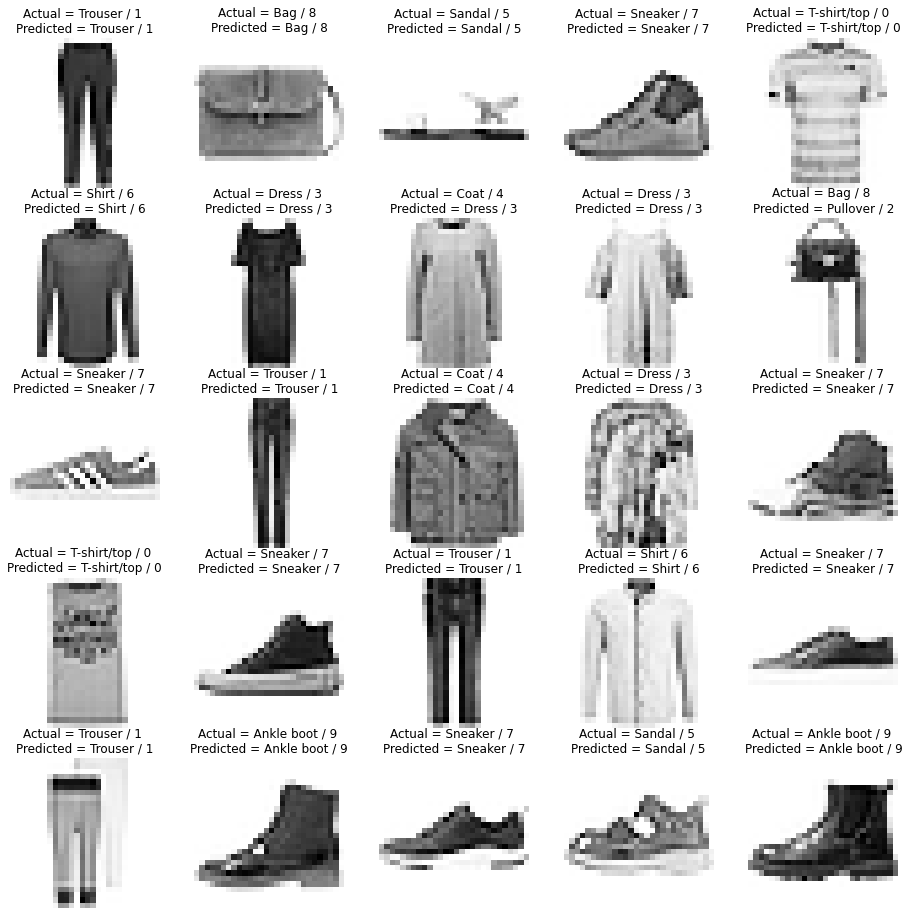

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(P_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[Q_test[i]], Q_test[i], class_labels[np.argmax(Q_pred[i])],np.argmax(Q_pred[i])))
  plt.axis('off')

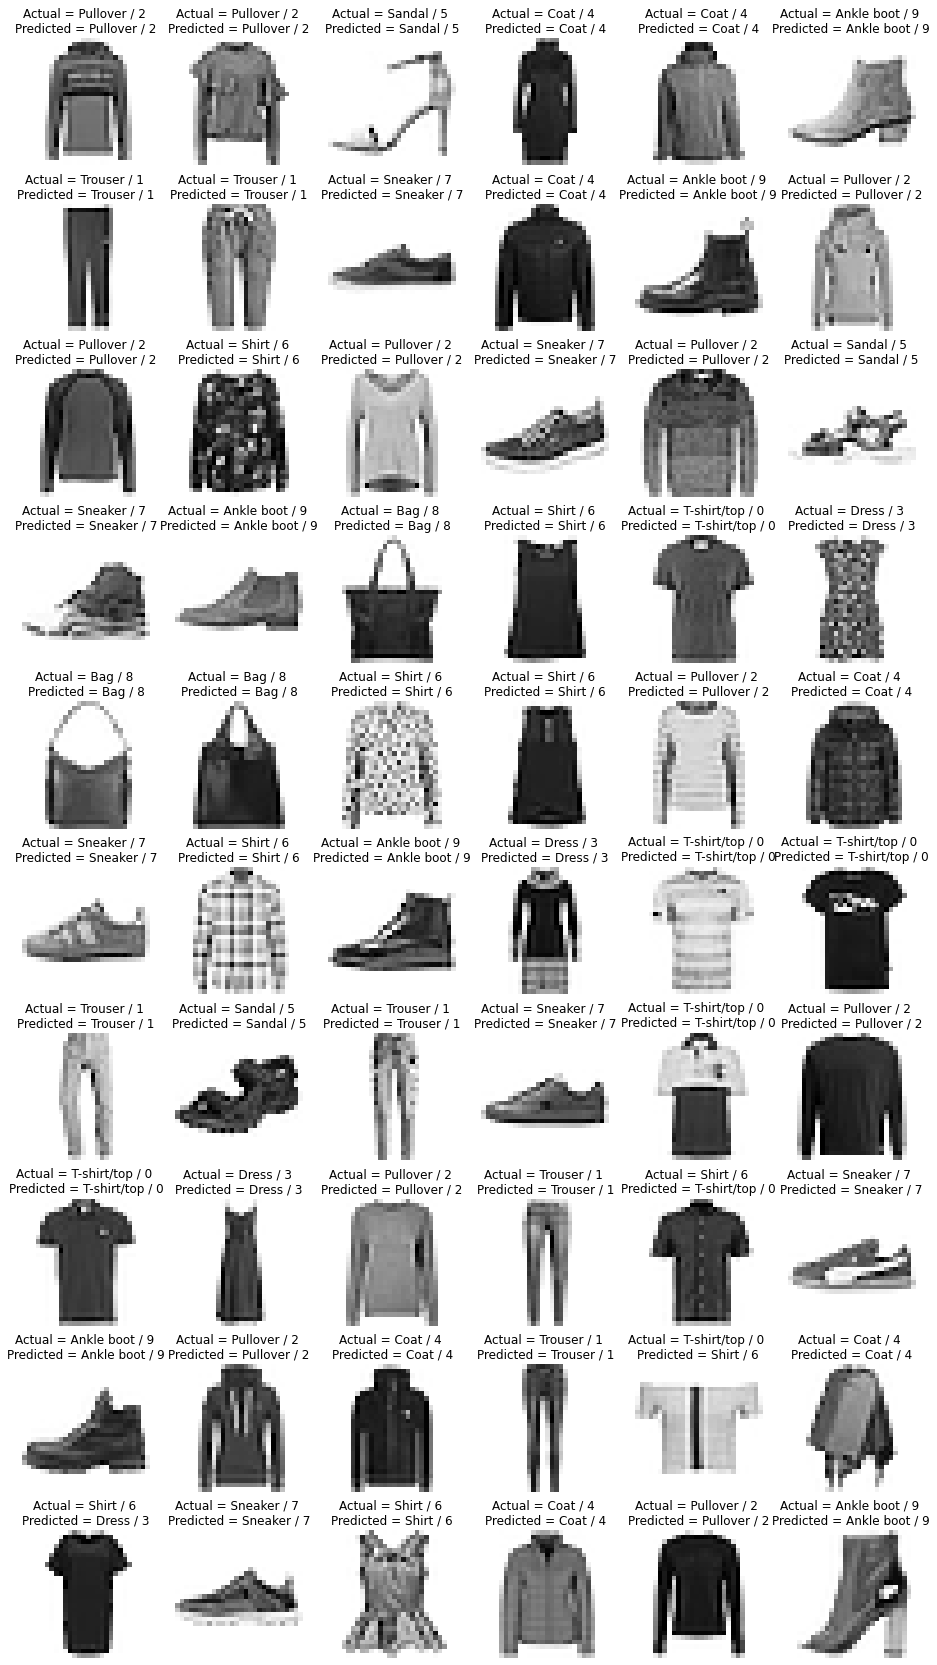

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(P_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[Q_test[i]], Q_test[i], class_labels[np.argmax(Q_pred[i])],np.argmax(Q_pred[i])))
  plt.axis('off')

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
Q_pred_labels = [ np.argmax(label) for label in Q_pred ]
cm = confusion_matrix(Q_test, Q_pred_labels)

<Figure size 1152x648 with 0 Axes>

Classification Report

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.89      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.79      0.91      0.84      1000
       Dress       0.92      0.89      0.91      1000
        Coat       0.87      0.83      0.85      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.80      0.67      0.73      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



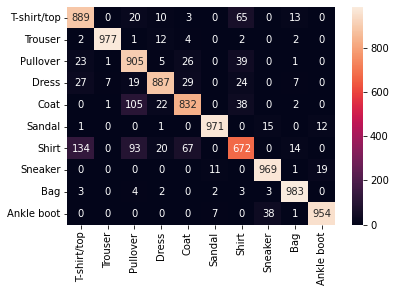

In [ ]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

from sklearn.metrics import classification_report
cr= classification_report(Q_test, Q_pred_labels, target_names=class_labels)
print(cr)

In [ ]:
model.save('Annapureddy_Mahidhar_Reddy_Fashion_MNIST_cnn_Model.h5')

Complex CNN Models

In [ ]:
#First Complex CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

#Compiling the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

#Training the Model
cnn_model2.fit(P_train, Q_train, epochs=30, batch_size=512, verbose=1, validation_data=(P_Validation, Q_Validation))

cnn_model2.save('Annapureddy_Mahidhar_Reddy_Fashion_MNIST_complex_cnn_Model.h5')

cnn_model2.evaluate(P_test, Q_test)

#Second Complex CNN Model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

#Compliling the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

#Training the Model
cnn_model3.fit(P_train, Q_train, epochs=35, batch_size=512, verbose=1, validation_data=(P_Validation, Q_Validation))

cnn_model3.save('Annapureddy_Mahidhar_Reddy_Fashion_MNIST_complex_cnn_Model.h5')

cnn_model3.evaluate(P_test, Q_test)

Epoch 1/30
94/94 [==============================] - 32s 338ms/step - loss: 1.0369 - accuracy: 0.6211 - val_loss: 0.5604 - val_accuracy: 0.7819
Epoch 2/30
94/94 [==============================] - 28s 294ms/step - loss: 0.5302 - accuracy: 0.8043 - val_loss: 0.4398 - val_accuracy: 0.8357
Epoch 3/30
94/94 [==============================] - 27s 290ms/step - loss: 0.4422 - accuracy: 0.8371 - val_loss: 0.3983 - val_accuracy: 0.8520
Epoch 4/30
94/94 [==============================] - 27s 291ms/step - loss: 0.3876 - accuracy: 0.8569 - val_loss: 0.3442 - val_accuracy: 0.8724
Epoch 5/30
94/94 [==============================] - 29s 310ms/step - loss: 0.3549 - accuracy: 0.8707 - val_loss: 0.3399 - val_accuracy: 0.8738
Epoch 6/30
94/94 [==============================] - 27s 291ms/step - loss: 0.3292 - accuracy: 0.8807 - val_loss: 0.3226 - val_accuracy: 0.8808
Epoch 7/30
94/94 [==============================] - 27s 289ms/step - loss: 0.3148 - accuracy: 0.8852 - val_loss: 0.3119 - val_accuracy: 0.8873

[0.38952702283859253, 0.9056000113487244]